# Homework

In [10]:
#Handy imports from class

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal

df = pd.read_csv('temperatures/temperature.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


### 1. Write a function that efficiently converts every column to a different temperature scale

In [11]:
def convert_temp(t):
    return t - 273.15

In [12]:
df_temp = df.loc[:, 'Vancouver'::].apply(convert_temp)
#df_temp = df.apply(convert_temp)
print(df_temp.head())

   Vancouver  Portland  San Francisco   Seattle  Los Angeles  San Diego  \
0        NaN       NaN            NaN       NaN          NaN        NaN   
1  11.480000  8.930000      16.330000  8.650000    18.720000  18.380000   
2  11.479041  8.933252      16.324993  8.647217    18.718186  18.383501   
3  11.476998  8.941866      16.310618  8.639833    18.712844  18.393355   
4  11.474955  8.950481      16.296243  8.632449    18.707503  18.403209   

   Las Vegas    Phoenix  Albuquerque     Denver  ...  Philadelphia   New York  \
0        NaN        NaN          NaN        NaN  ...           NaN        NaN   
1  20.260000  23.450000    11.970000  11.460000  ...     12.480000  15.070000   
2  20.253141  23.458509    12.004558  11.457306  ...     12.513208  15.097676   
3  20.242177  23.481487    12.083952  11.449918  ...     12.606824  15.176940   
4  20.231213  23.504466    12.163345  11.442530  ...     12.700440  15.256203   

    Montreal     Boston  Beersheba  Tel Aviv District      Eil

### 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.  

That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end

In [13]:
#last_nan = df.last_valid_index()
#df.index[last_nan]

#know where index of knowns ends (gives datetime)
#save timestamp
#took timestamp and looked for it in Series 'x': x[x == xEndTime].index[0]
#x = x[:xEndIndex +1] 
#interpolates to last datapoint

In [16]:
def missing_val(df):
    for column in df.columns[1:]:
        
        valid_df = df.loc[df[column].first_valid_index(): df[column].last_valid_index(),['datetime', column]]
        
        x = valid_df['datetime']
        knowns = valid_df.loc[~valid_df[column].isnull(), ['datetime', column]]
        xp = knowns['datetime']
        fp = np.array(knowns[column])
        
        df[column].loc[df[column].first_valid_index():df[column].last_valid_index()] = np.interp(x, xp, fp)
    return df

In [17]:
missing_val(df)

/Users/yewandetaiwo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

In [ ]:
df['month'] = pd.DatetimeIndex(df['datetime']).month

weather_info = df.groupby('month')
weather_avg = weather_info.mean()
weather_avg

### 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual

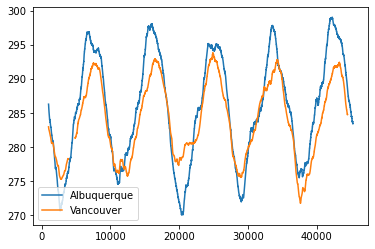

In [7]:
plt.plot(df['Albuquerque'].rolling(1000).mean(), label = "Albuquerque")
plt.plot(df['Vancouver'].rolling(1000).mean(), label = "Vancouver")
plt.legend()
plt.show()